## Temporal Structure 

What we already know about how to preprocess the time-series data?
Fundamentals

- Feature engineering:
- Time-series Visualization
- Resampling
- Moving average for Data prepration, feature engineering, prediction
- Power transform

Temporal Structure

- White noise
- Random Walk
- 

#### White noise

White noise have the same intensity at all frequency in a signal.In context of time-series, this means, all the values in the series has the identical distribution with mean of zero.

 **Is your Time Series White Noise?**
 Your time series is not white noise if any of the following conditions are true:
-  ˆ
 Does your series have a non mean?
- Does
 Does the variance change over 
- Do ?
 Do values correla lag values?v

lues?
 Some tools that you can use to check if your time series is white no
 
- ˆ
 ˆ
 ˆ
 Create a line plot. Check for gross features like a changing mean, variance or obvious
 relationship between lagg
-  variables.
 Calculate summary statistics. Check the mean and variance of the wholeteries against
 the mean and variance of meaningful contiguous blocks of values in the seres (e.g. days,
 mo
- hs, or years).
 Create an autocorrelation plot. Check for gross correlation between lagged variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import gauss

In [36]:
#lets create an example of white noise
np.random.seed(1)
white_noise =pd.Series([gauss(mu=0.0,sigma=1.0) for i in range(1000)]) # mu=mean, sigma=std
white_noise.describe()

count    1000.000000
mean        0.029093
std         0.995241
min        -3.128795
25%        -0.660852
50%         0.063875
75%         0.702855
max         3.412366
dtype: float64

<Axes: >

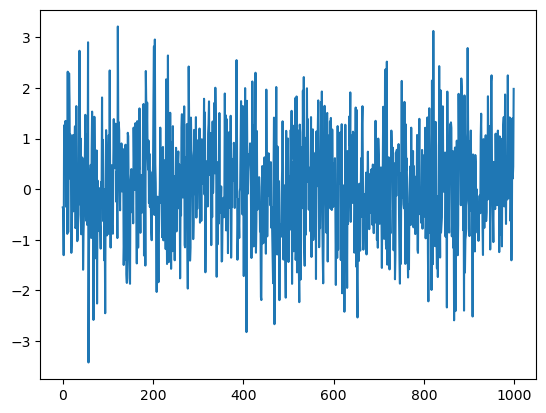

In [19]:
white_noise.plot() #just random

<Axes: >

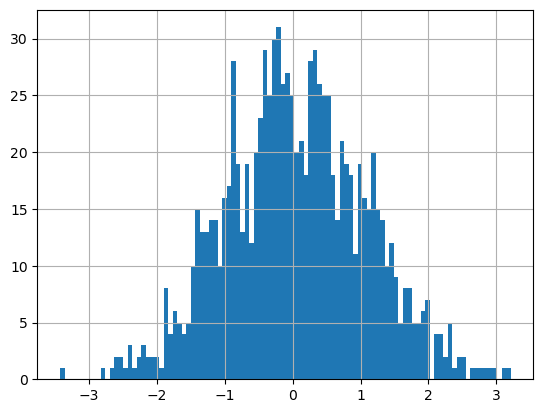

In [16]:
white_noise.hist(bins=100)
# the distribution is gaussina, mean=0,std=1. the data is equally distributed
# which is impossible for a time-series data, as it is generated over time

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

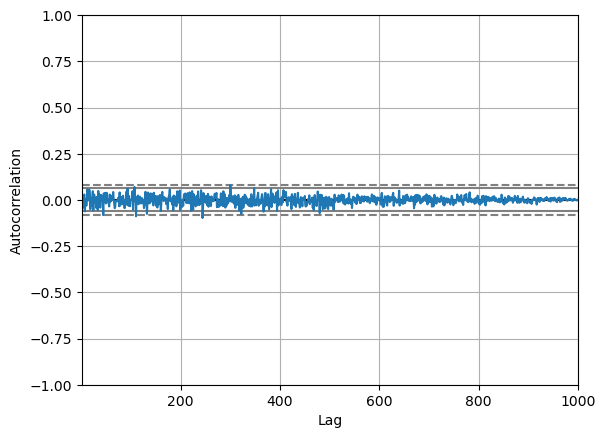

In [10]:
pd.plotting.autocorrelation_plot(white_noise)
# the correlation is 0 even with itself(lag=0)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

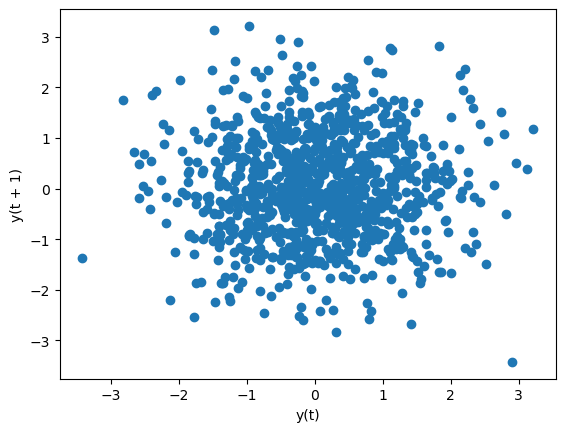

In [18]:
pd.plotting.lag_plot(white_noise,lag=1)
#no correlation is found between lags

### Testing with Real-life data

In [42]:
minTemp = pd.read_csv('alburyMinTemp',index_col=False)
pre9 = pd.read_csv('alburyPre9am',index_col=False,header=[''])

minTemp.info()
pre9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3040 non-null   int64  
 1   MinTemp     3029 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 47.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3040 non-null   int64  
 1   Pressure9am  3035 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 47.6 KB


In [44]:
pre9.rename(columns={'Unnamed: 0':'Index'},inplace=True)
pre9.drop('Index',inplace=True,axis=1)

In [45]:
pre9

,Pressure9am
0,1007.7
1,1010.6
2,1007.6
3,1017.6
4,1010.8
...,...
3035,1029.4
3036,1029.4
3037,1022.3
3038,1018.8


<Axes: >

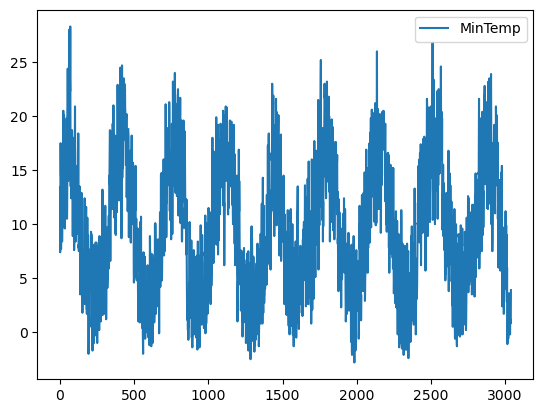

In [26]:
#checking white noise in minTempSeries
minTemp.plot()

array([[<Axes: title={'center': 'MinTemp'}>]], dtype=object)

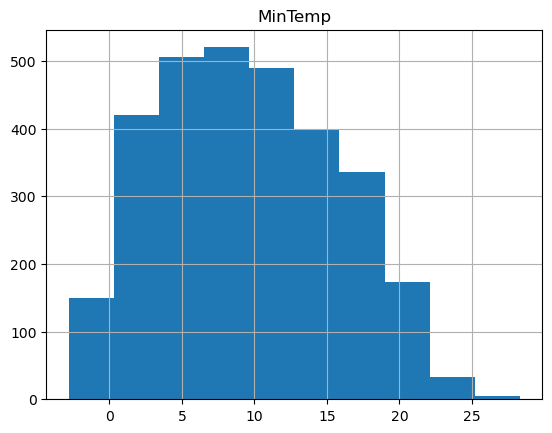

In [27]:
minTemp.hist()

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

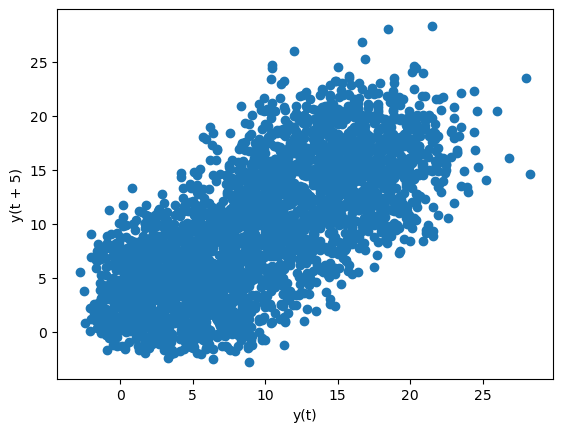

In [40]:
pd.plotting.lag_plot(minTemp,lag=5)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

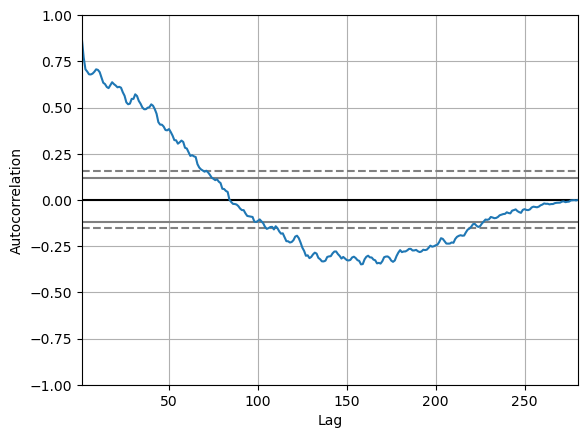

In [69]:
pd.plotting.autocorrelation_plot(minTemp['MinTemp'][:280])

<Axes: >

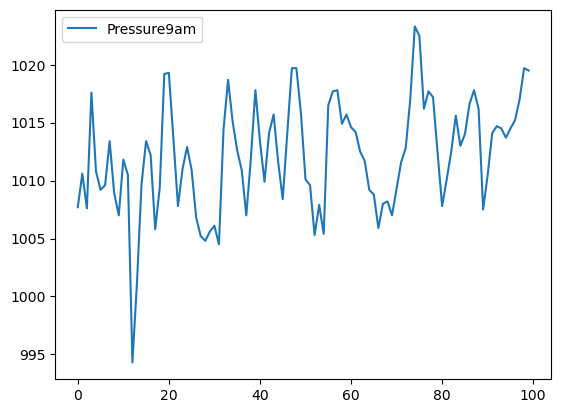

In [51]:
pre9[:100].plot()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

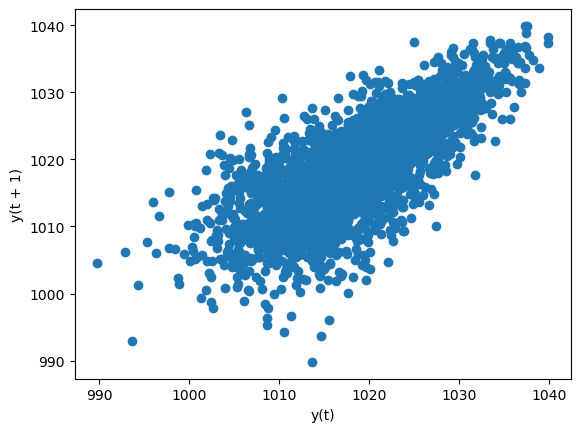

In [49]:
pd.plotting.lag_plot(pre9)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

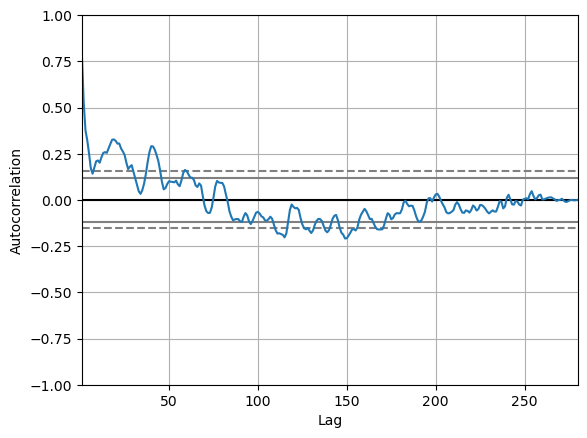

In [70]:
pd.plotting.autocorrelation_plot(pre9[:280]) #converges after 250, after 250 lag
#there is no correlation

### Random Walk

**What is Random Walk?**

Random walk means that the values at `t` are `randomly` generated from `t-1/t-2/t-3/etc.` values. There is a autocorrelation between the values but they are random correlation. Even no matter how much we try to identify that `random funtion` to model we can't find exactly what that function is..

e.g., people think that stock market values are random walk of its previous data. So one never can never nearly predict the next random walk value. Thus model will always results in error which is white noise(random errors will be generated.. each time we try to predict)

**Characteristic of random walk time-series:**

1. time-series shows ***strong temporal dependences that decays*** linearly or in a simple pattern.
      - Can be seen using autocorrelation plot as temporal decay and converges..
2. time-series is non-stationary and ***making them stationary shows no obvious learnable structure***(no temporal dependence)
      Non-stationary : series is function of time.so random walk is non-stationary.Thus all non-stationary time-series is random-walk
      Stationary time-series : series is not a function of time

  - we can check this fact of showing no temporal structure after converting them to stationary by:
    
        - Dickey-Fuller test
        - plots: autocorrelation plot, line plot, lag plot
3. ***persistance model***(model that doesn't change/learn after getting new observation) provides ***best reliable prediction***. Dynamic models keep learning with new observation, as the values are random-walk model changes.


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

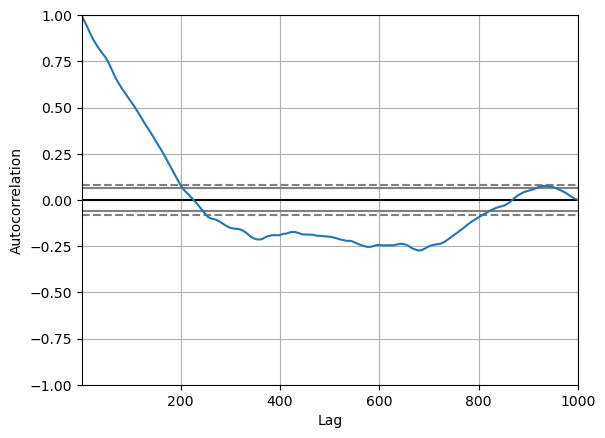

In [72]:
np.random.seed(1)
random_walk= []
random_walk.append(-1 if np.random.random() < 0.5 else 1)
for i in range(1,1000):
    movem = -1 if np.random.random() < 0.5 else 1
    value = random_walk[i-1] + movem #adding the current random_no.(movem) with previous
                                    #so values can correlate with time
    random_walk.append(value)

pd.plotting.autocorrelation_plot(random_walk) # temporal structure decays linearly

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

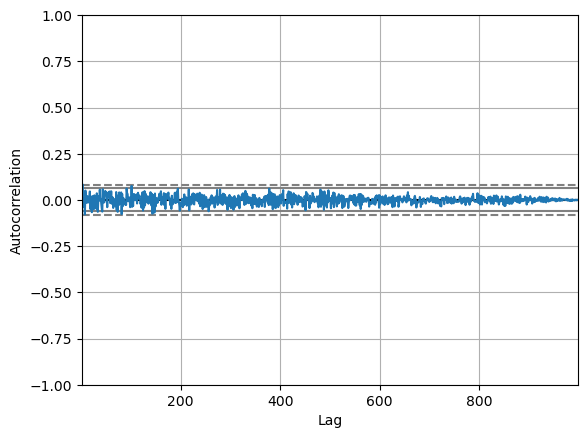

In [83]:
#lets make stationary series of random-walk
sta_rw = [] #make stationary by subtracting t - t-1
for i in range(1,1000):
    val = random_walk[i] - random_walk[i-1]
    sta_rw.append(val)

pd.plotting.autocorrelation_plot(sta_rw)


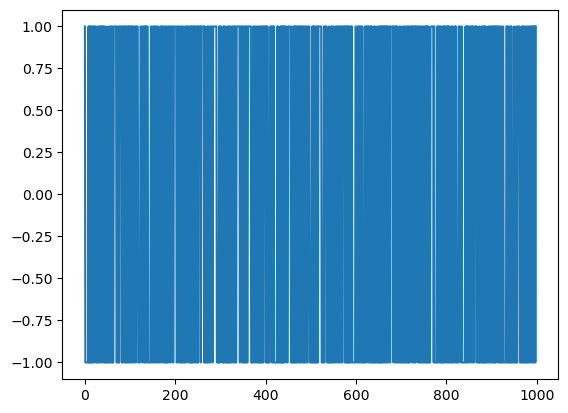

In [82]:
plt.plot(sta_rw)

In [87]:
#now for the fact 3, we can try to predict using persistant , dynamic model
from sklearn.metrics import mean_squared_error
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
 # persistence
predictions = list()
history = train[-1]
for i in range(len(test)):
 yhat = history
 predictions.append(yhat)
 history = test[i]
rmse = np.math.sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.000


In [90]:
# train_size = int(len(random_walk) * 0.66)
# train, test = random_walk[0:train_size], random_walk[train_size:]
#  # random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
 yhat = history + (-1 if np.random.random() < 0.5 else 1)
 predictions.append(yhat)
 history = test[i]
rmse = np.math.sqrt(mean_squared_error(test, predictions))
print('Random RMSE: %.3f' % rmse)

Random RMSE: 1.455


### Decomposing Time-series Data

To better analys that tim-series, a abstrach model is made that thinks time-series consist of these below 4 components, obvious by looking series in long-run.

Time-series is made up of 4 components:
- Level (always present) : Levels of values
- Noise (always present) : randmoness in the value(random_walk,white noise)
- Trend (optional) : increase or decrease of value in long run
-  Seasonality (optional) : increase or decrease of value periodically(in every six month, every 3 hour,every 10 years)

We can use these components for modelling, as they provide temporal data, these can be used as features. 

Decomposing these 4 component using :

`from statsmodels.tsa.seasonal import seasonal_decompose`

In [94]:
minTemp.interpolate(method='linear',inplace=True)
pre9.interpolate(method='linear',inplace=True)
#mintemp of the day, so mean is too harsh, ffill is good,
# as mintemp doesn't gonna change for the next day that much
# or we can use center_window_average, taking mean of previous and next day
# or interpolate using linear this is best sutied here

In [190]:
df = pd.read_csv('weatherAUS.csv',parse_dates=True,index_col='Date')


In [146]:
alb = df[df['Location']=='Albury']['MinTemp'].copy()
alb.index.min()-alb.index.max()

Timedelta('-3128 days +00:00:00')

In [150]:
len(alb) #3040
alb.index.min()-alb.index.max() 

Timedelta('-3128 days +00:00:00')

In [158]:
alb.interpolate(method='linear',inplace=True)

In [159]:
alb.isnull().sum()

0

In [203]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(alb,model='additive',period=365)
#period: no.of observation to take for extracting trends, seasonality.. here i have daily data, so i can calculate for daily/weekly/monthly/yearly/2-year
#i choose to see trends, seasnality annually(365 days)

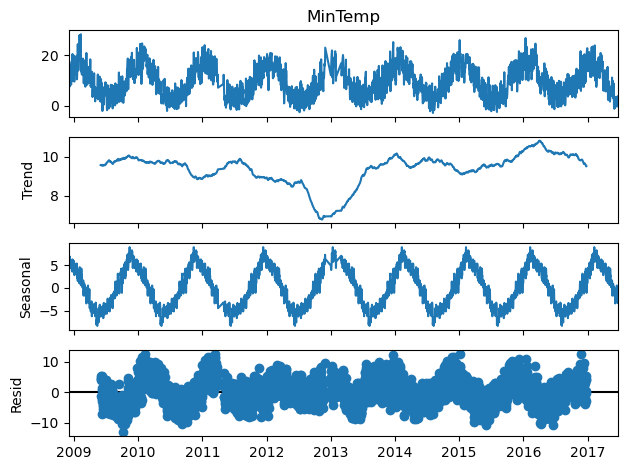

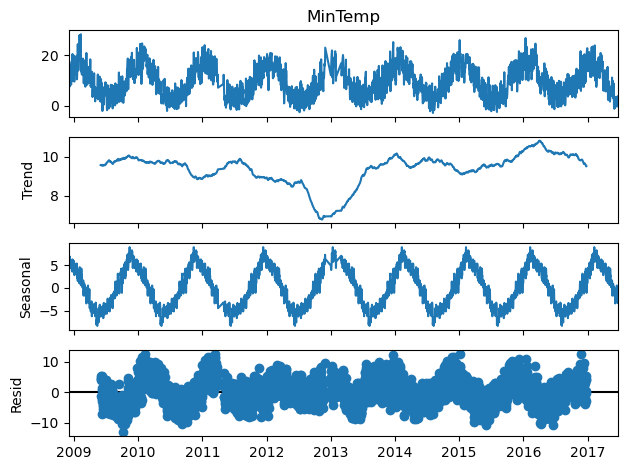

In [204]:
results.plot()

In [187]:
series = [i+np.random.randint(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive',period=7)



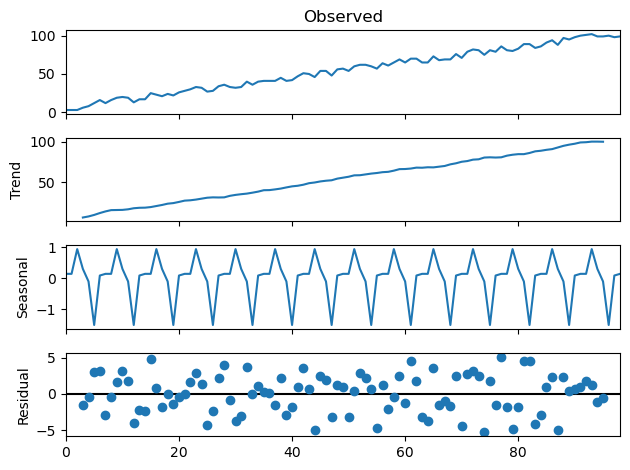

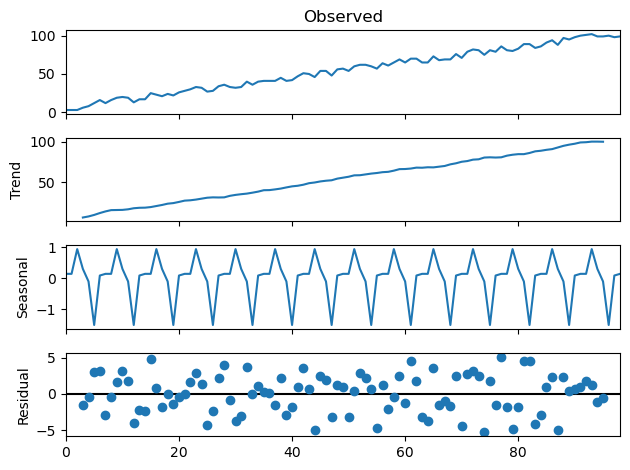

In [188]:
result.plot()

### Trend component

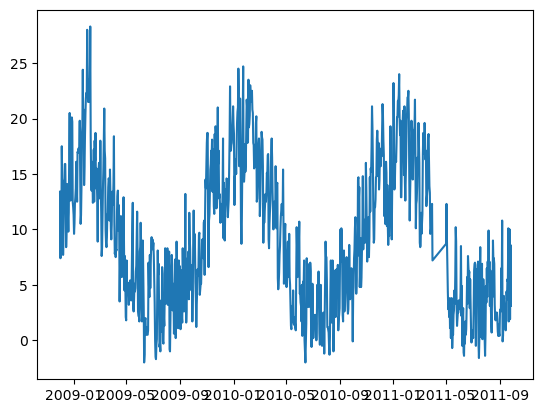

In [213]:
plt.plot(alb[:1000]) # by looking at the graph, we can see there is seasonality every year
#as temperature increases as summer comes(start of year),and decreases as winter comes(mid-end of year)
# the trend is short-term increases decreses both in the year


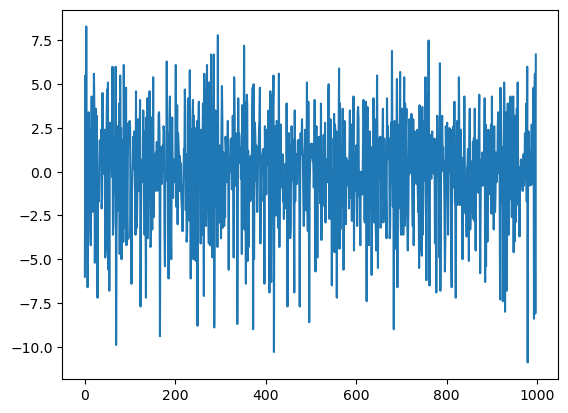

In [214]:
#detrending using differencing
difftem = []
for i in range(1,len(alb[:1000])-1):
    val = alb[i] - alb[i-1]
    difftem.append(val)

plt.plot(difftem) # does work as trend for three year was linear, differing them gives the difference between them..thus trend values removed..
# the original range was :[0,30] now range is:[-10,9]

In [215]:
# detrend using model fitting
from seaborn import regplot

In [219]:
alb.values

array([13.4,  7.4, 12.9, ...,  1.1,  1.1,  3.9])

In [223]:
yle=range(0,len(alb)-1)
yle

range(0, 3039)

<Axes: >

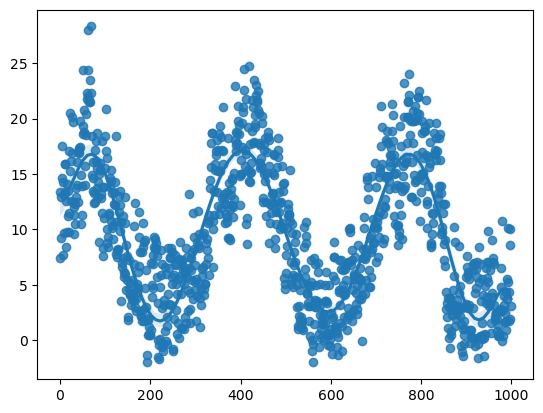

In [235]:
regplot(alb,y=alb.values[:1000],x=[i for i in range(0,len(alb[:1000]))],
        order=9) # shows that trend(actually it is seasonality,periodic) is non-liner of order 9. Thus linermodel with order 9 can be fitted to
#remove the trend and also seasonality

### Seasonality

This also can be removed using differencing and modeling..->diff

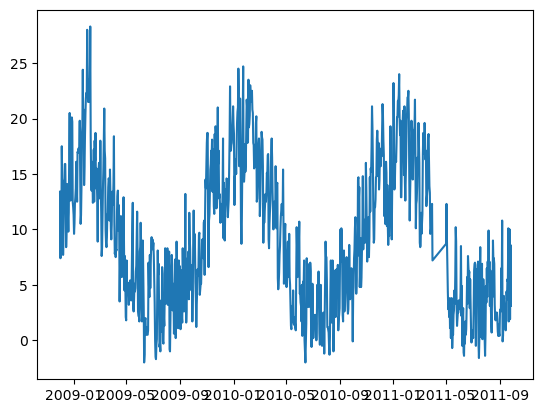

In [277]:

X = [i%365 for i in range(0, len(alb[:1000]))]
y = alb.values[:1000]
degree = 4
coef = np.polyfit(X, y, degree)
 # create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
         value += X[i]**(degree-d) * coef[d]
    curve.append(value)
 # create seasonally adjusted
values = alb.values[:1000]
diff = list()
for i in range(len(values)):
 value = values[i]- curve[i]
 diff.append(value)

plt.plot(alb[:1000])
# plt.plot(curve)


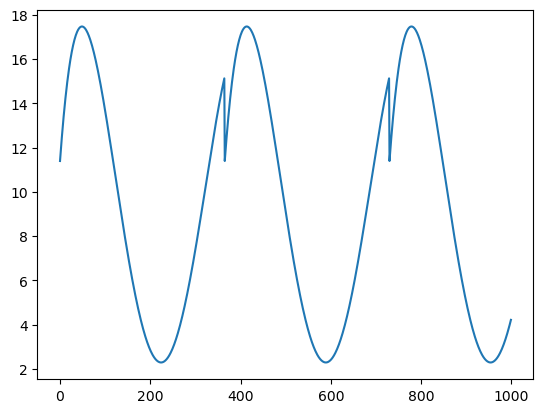

In [278]:
plt.plot(curve)


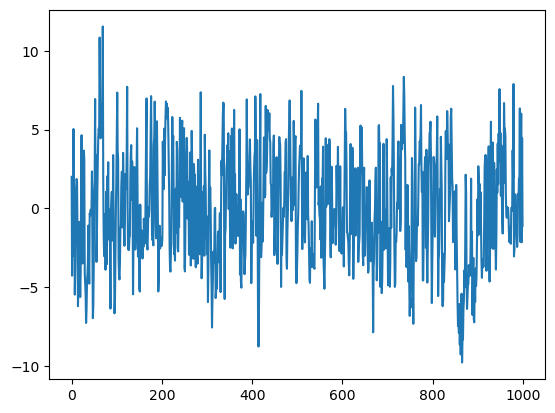

In [275]:
plt.plot(diff)


### Stationary

**Importance of Stationary time-series**

Stationary time-series : the series has the consistence stats summary(mean,variance,std) across end. 

Why need to make stationary?

As model think that everywhere the function is same, but when fluctuations appear(in form of trends,levels,seasonality that only depends on at that time ) model tries to again creates new function..and if this process keeps continue.. we end up with a function that is only modelled on the end-side of dataset and not on the whole time-series. So during inference we get false predictions.

**How to check stationary?**

- Plots
- stats summary of splitted data
- Dickey-Fuller test/unit-test

After removing trends,seasonality check again to confirm the stationary

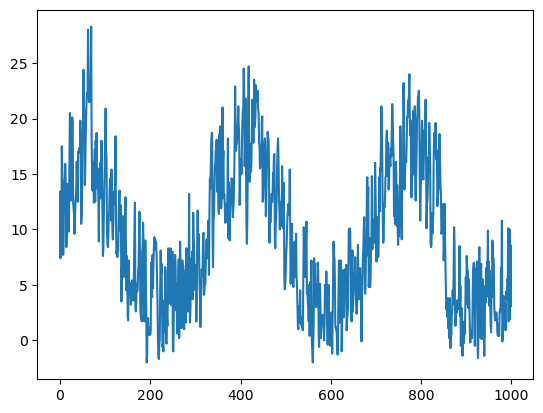

In [287]:
alb10 = alb.values[:1000]
plt.plot(alb10) # easily can be seen trends,seasonlaity thus non-statinary

In [288]:
#using stats summary
x1,x2 = alb10[:500],alb10[500:]
print('Mean of x1:',x1.mean(),"\tstd:",x1.std(),"\n"
      "\nMean of x2:",x2.mean(),"\tstd:",x2.std())
#well the stats are close.. this can be misleading..

Mean of x1: 11.1475 	std: 6.118130331236824 

Mean of x2: 7.7476 	std: 6.162452169388416


In [300]:
#unit-test
from statsmodels.tsa.stattools import adfuller
test = adfuller(alb10)
print("adf:",test[0],
      "\npvalue:",test[1],
     "\nuse lag:",test[2],
     "\nno.of observation used for calculation:",test[3],
     "\ncritical value:",test[4])

#if adf < critical values then fail to reject H0(null-hypo:series is non-stationary),
#thus series is non-stationary

adf: -2.296103076839433 
pvalue: 0.1732278873150504 
use lag: 10 
no.of observation used for calculation: 989 
critical value: {'1%': -3.436979275944879, '5%': -2.8644668170148058, '10%': -2.5683283824496153}
